In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_191605/1276451955.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Figure showing test aucs for final configs

In [2]:
out_dir = "/volatile/jl277509/Runs/02_STS_babies/Program/Output"

dict_values = {
    "PCA - Linear SVM": {
        "PCS": np.array([0.595])*100,
        "OFC": np.array([0.498])*100
    },
    "Logistic": {
        "PCS": np.array([0.6195445920303605])*100,
        "OFC": np.array([0.6171394484409242])*100
    },
    "ElasticNet": {
        "PCS": np.array([0.7201138519924098])*100,
        "OFC": np.array([0.6098809629161359])*100
    },
    "rbf-SVM": {
        "PCS": np.array([0.748])*100,
        "OFC": np.array([0.6512508148626943])*100
    },
    #"Old ConvNet": { # here 256 dims
    #    "PCS": np.array([0.744, 0.728, 0.714, 0.699, 0.726])*100,
    #    "OFC": np.array([0.633, 0.634, 0.652, 0.595, 0.681])*100
    #},
    "Old ConvNet": {
        "PCS": np.array([0.7039848197343453, 0.7191650853889943, 0.7597722960151803, 0.7333965844402277, 0.7523719165085389])*100,
        "OFC": np.array([0.498349753398885, 0.5215240533386736, 0.5006410424225224, 0.49750272189859845, 0.4636370569191351])*100
    },
    "New ConvNet": {
        "PCS": np.array([0.834, 0.820, 0.860, 0.844, 0.836])*100,
        "OFC": np.array([0.786, 0.791, 0.790, 0.794, 0.777])*100
    },
    "Supervised": {
        "PCS": np.array([0.761, 0.809, 0.811, 0.789, 0.778])*100,
        "OFC": np.array([0.714, 0.721, 0.704, 0.718, 0.679])*100
    }
}

cols = ['Model', 'Task', 'AUC']

In [3]:
dict_values

{'PCA - Linear SVM': {'PCS': array([59.5]), 'OFC': array([49.8])},
 'Logistic': {'PCS': array([61.9544592]), 'OFC': array([61.71394484])},
 'ElasticNet': {'PCS': array([72.0113852]), 'OFC': array([60.98809629])},
 'rbf-SVM': {'PCS': array([74.8]), 'OFC': array([65.12508149])},
 'Old ConvNet': {'PCS': array([70.39848197, 71.91650854, 75.9772296 , 73.33965844, 75.23719165]),
  'OFC': array([49.83497534, 52.15240533, 50.06410424, 49.75027219, 46.36370569])},
 'New ConvNet': {'PCS': array([83.4, 82. , 86. , 84.4, 83.6]),
  'OFC': array([78.6, 79.1, 79. , 79.4, 77.7])},
 'Supervised': {'PCS': array([76.1, 80.9, 81.1, 78.9, 77.8]),
  'OFC': array([71.4, 72.1, 70.4, 71.8, 67.9])}}

In [4]:
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

In [6]:
# Do we need titles ?

params = {'axes.labelsize': 13,
          'axes.titlesize': 15}
plt.rcParams.update(params)

In [7]:
def plot_df_perf(df, x, y, col, hue):

    sns.set_style('whitegrid')
    fig = plt.figure(dpi=400)
    #sns.set_style('ticks')
    g = sns.catplot(
        df, kind="bar",
        x=x, y=y, col=col,
        height=4, aspect=.4, hue=hue,
    )
    g.set_axis_labels(x, y)
    g.set(ylim=(45,100))
    for ax in g.axes.ravel():
        for c in ax.containers:
            labels = [f'{v.get_height():.1f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', padding=10, fontsize=11)
        ax.margins(y=0.1)
        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.set_xlabel('')
        ax.set_ylabel('AUC', fontsize=13)
        #ax.set_title('')

    plt.show()

<Figure size 2560x1920 with 0 Axes>

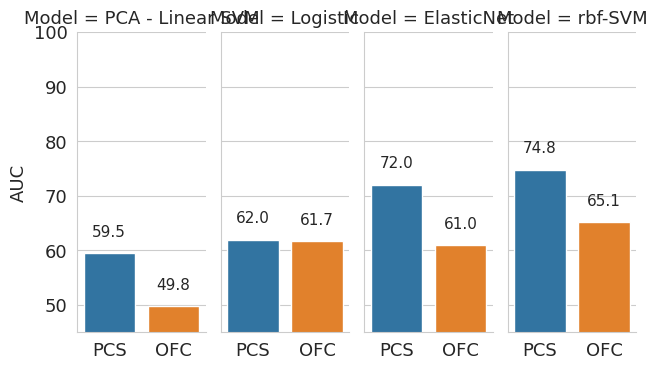

<Figure size 2560x1920 with 0 Axes>

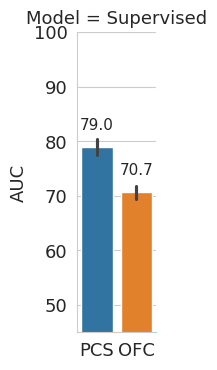

<Figure size 2560x1920 with 0 Axes>

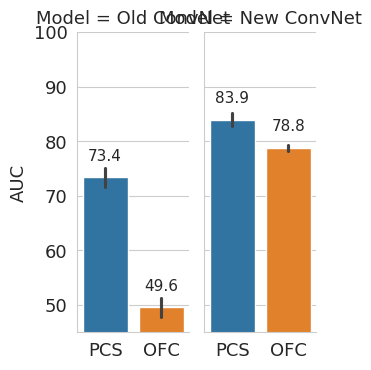

<Figure size 2560x1920 with 0 Axes>

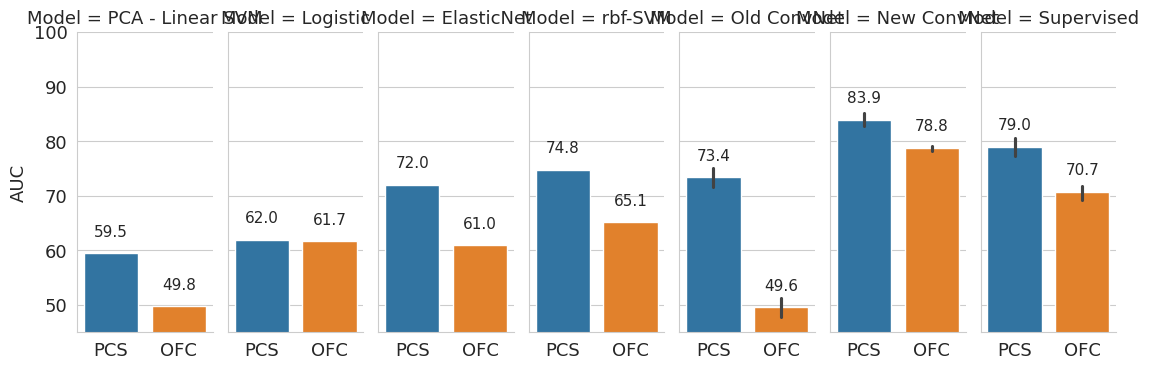

In [8]:
df_to_plot = df.loc[df['Model'].isin(['PCA - Linear SVM', 'Logistic', 'ElasticNet', 'rbf-SVM'])]
plot_df_perf(df_to_plot, x="Task", y="AUC", col="Model", hue="Task")
df_to_plot = df.loc[df['Model'].isin(['Supervised'])]
plot_df_perf(df_to_plot, x="Task", y="AUC", col="Model", hue="Task")
df_to_plot = df.loc[df['Model'].isin(['Old ConvNet', 'New ConvNet'])]
plot_df_perf(df_to_plot, x="Task", y="AUC", col="Model", hue="Task")

df_to_plot = df.loc[df['Model'].isin(['PCA - Linear SVM', 'Logistic', 'ElasticNet', 'rbf-SVM', 'Supervised', 'Old ConvNet', 'New ConvNet'])]
plot_df_perf(df_to_plot, x="Task", y="AUC", col="Model", hue="Task")

# Custom cross-val on intermediate configs (train-val AUCs !)

PCS: 71 epochs

BT: 151 epochs, train for 100 more ? Especially BarlowTwins config, would have benefited from longer training ?

In [5]:
dict_values = {
    "Old Model": {
        "PCS": np.array([0.7659402654867257, 0.7661172566371681, 0.7690154867256637, 0.7405973451327433, 0.7885011061946903])*100,
        "OFC": np.array([0.46386653458987526, 0.47634386314994226, 0.44127526293819996, 0.4660554938803133, 0.4390893572527326])*100
    },
    "Embedding space 10 -> 256": {
        "PCS": np.array([0.8101880530973451, 0.7968805309734514, 0.796283185840708, 0.7975442477876106, 0.7853318584070796])*100,
        "OFC": np.array([0.6197554805252087, 0.604881749300877, 0.6186036477683453, 0.632443212510928, 0.6455781461909018])*100
    },
    "Mixed Augmentations": {
        "PCS": np.array([0.8715210176991149, 0.8509292035398228, 0.8651438053097346, 0.8785951327433628, 0.8485951327433628])*100,
        "OFC": np.array([0.7289423069443699, 0.6869523607997007, 0.751601105976872, 0.746822893265823, 0.7024452287256375])*100
    },
    "BarlowTwins": {
        "PCS": np.array([0.870337389380531, 0.89179203539823, 0.8787610619469026, 0.8903373893805309, 0.873849557522124])*100,
        "OFC": np.array([0.7425744800233329, 0.746218115284535, 0.7212837117624833, 0.7240010561558039, 0.7253543896025278])*100
    },
    "Larger Backbone": {
        "PCS": np.array([0.8678761061946902, 0.8651935840707964, 0.8760730088495574, 0.8633130530973452, 0.8764491150442477])*100,
        "OFC": np.array([0.7855158766684308, 0.7846578697434576, 0.7811252513910792, 0.7843219102463557, 0.7797131440032584])*100
    },
    "1.5mm": {
        "PCS": np.array([0.8713772123893806, 0.8682577433628319, 0.8700553097345134, 0.8676825221238937, 0.8688495575221238])*100,
        "OFC": np.array([0.7853483966755753, 0.7642963343123235, 0.7646260391052713, 0.7773457377516174, 0.7792450663579908])*100
    },
    #    "500 epochs": {
    #    "PCS": np.array([0.86])*100,
    #    "OFC": np.array([0.78])*100
    #},
}

cols = ['Model', 'Task', 'AUC']

In [6]:
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

In [7]:
plot_df_perf(df, x="Task", y="AUC", col="Model", hue="Task")

NameError: name 'plot_df_perf' is not defined

Plot in line to explicitly describe the changes from one model to the next ?

/volatile/jl277509/Runs/02_STS_babies/Program/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/volatile/jl277509/Runs/02_STS_babies/Program/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


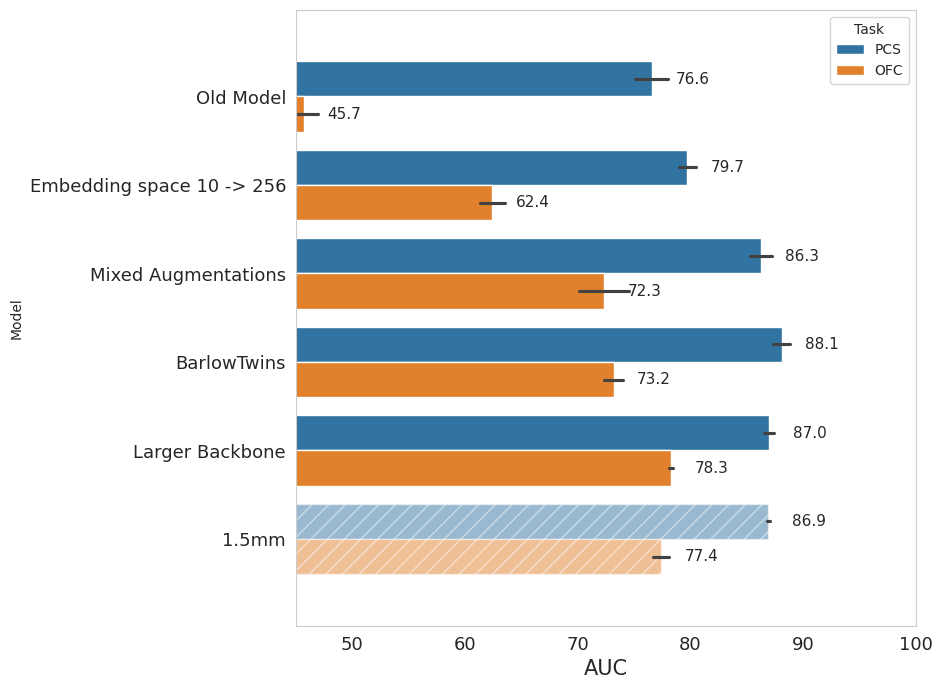

In [11]:
fig = plt.figure(figsize=(8,8))
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(df, x='AUC', y='Model', hue='Task', orient='y')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('AUC', fontsize=15)
#plt.set_axis_labels('AUC', 'Model')
ax.set_xlim([45,100])
#for ax in g.axes.ravel():
for c in ax.containers:
    labels = [f'{v.get_width():.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=17, fontsize=11)
ax.margins(y=0.1)

# add a hatch on 1.5mm bar
num_locations = [5,11]
alpha = 0.5
hatch = '//'
for i, bar in enumerate(ax.patches):
    if i in num_locations:
        bar.set_hatch(hatch)
        bar.set_alpha(alpha)

# MAE ISOMAP regression

In [10]:
dict_values = {
    'dim1': [0.43119568596491575, 0.45277801124757117, 0.43288435403743075, 0.4322106283139675, 0.45023678452407445],
    'dim2': [0.48617861378854066, 0.49488067602816965, 0.5121718943644694, 0.5085363558831748, 0.50091473525584],
    'dim3': [0.3929682945996356, 0.40388444486877356, 0.4039085610112668, 0.4091000573916857, 0.40789790043773216],
    'dim4': [0.4731631435749787, 0.47798056366527164, 0.4841463315432149, 0.4719293541236189, 0.47888790151579647],
    'dim5': [0.5671071163031346, 0.5706073945214634, 0.5550150861264252, 0.5585034581835658, 0.5749221420360437],
    'dim6': [0.5782648341662783, 0.5660707846999857, 0.5681007463524754, 0.5578194382497795, 0.5513462480037098]
}
cols = ['dim', 'MAE']

In [80]:
df = pd.DataFrame([[k, elem] for k, v in dict_values.items() for elem in v], columns=cols)

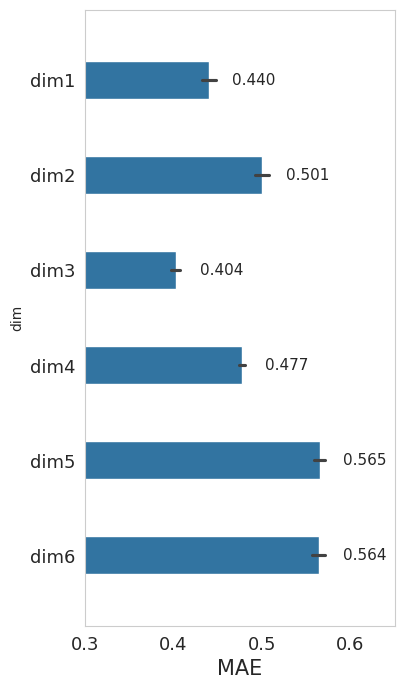

In [94]:
fig = plt.figure(figsize=(4,8))
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.barplot(df, x='MAE', y='dim', orient='y', width=0.4)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('MAE', fontsize=15)
#plt.set_axis_labels('AUC', 'Model')
ax.set_xlim([0.30,0.65])
#for ax in g.axes.ravel():
for c in ax.containers:
    labels = [f'{v.get_width():.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=17, fontsize=11)
ax.margins(y=0.1)

R2 instead of MAE ?

In [ ]:
dim1 = [0.6778259359548527, 0.6449334916577039, 0.6719130309671998, 0.6738635532917638, 0.6551988472836635,]

In [14]:
# train test values

# ISOMAP_CENTRAL = Champollion V0
dict_values = {
    'dim1': [0.5681823805354607, 0.5300198252894207, 0.550784703779826, 0.5493933421167468, 0.5436023447641944],
    'dim2': [0.5604949864498147, 0.5961780914143682, 0.5812493426640681, 0.5649760000429278, 0.6230684988625866],
    'dim3': [0.6756766786172105, 0.6977509729469739, 0.6876306175306238, 0.6789951785244372, 0.701299883105298],
    'dim4': [0.5402920674957211, 0.5795859415143207, 0.5568951542896349, 0.5642787815852802, 0.5909485383186083],
    'dim5': [0.24216459173532312, 0.2599987857624915, 0.2901668723544467, 0.2589030033254014, 0.2626067477609107],
    'dim6': [0.40717532453135796, 0.39044627205635335, 0.3704961125535745, 0.3770326528243648, 0.39197099810932]
}
cols = ['dim', 'R2']

In [18]:
for key, value in dict_values.items():
    print(key, np.mean(value), np.std(value))

dim1 0.5483965192971297 0.01231961345095536
dim2 0.5851933838867531 0.022757403369047302
dim3 0.6882706661449086 0.010046786215861912
dim4 0.5664000966407131 0.017623652211396723
dim5 0.2627680001877147 0.015477928721173961
dim6 0.38742427201499413 0.012762896302056733


In [19]:
# OLD_ISOMAP_CENTRAL
dict_values = {
    'dim1': [0.4564208052257961, 0.5074338641694048, 0.5064360654438462, 0.4604776411125468, 0.4782677874256449],
    'dim2': [0.42656375729845064, 0.46383946554762934, 0.3674508865319782, 0.43722486910695546, 0.4107795467435324],
    'dim3': [0.45420056814662424, 0.618732490268089, 0.26779927901532014, 0.3415273745699537, 0.5025947986646262],
    'dim4': [0.3459911694087659, 0.3368439719375617, 0.36307605057906295, 0.3220019810216173, 0.35686473972970423],
    'dim5': [0.0010610290765055016, 0.001512771108379671, 5.868870681657047e-07, 0.003672791861867945, 1.1824549150092416e-05],
    'dim6': [0.08929625975045476, 0.12281859603655325, 0.12573511954708017, 0.08935596683750648, 0.14018104854671118]
}
cols = ['dim', 'R2']

In [20]:
for key, value in dict_values.items():
    print(key, np.mean(value), np.std(value))

dim1 0.48180723267544784 0.021795657791559155
dim2 0.4211717050457092 0.03194131927796822
dim3 0.43697090213292267 0.12277551639498213
dim4 0.3449555825353424 0.014587103045614199
dim5 0.001251800696594275 0.001346757174294702
dim6 0.11347739814366116 0.020577490416351853


# Training on 5000, 10000, 20000 subjects

In [22]:
# OFC
l = [0.7515815218372016, 0.6947076142129949, 0.7828423875641572, 0.7189352049621862, 0.7010348997341966] #10000
l1 = [0.7582251743644076, 0.8015909627967353, 0.7977911963886133] # 5000, still one model to train
np.mean(l)

0.7298203256621474